**Восстановление смеси плотностей распределений.**

алгоритм EM 

Евгений Борисов <esborisov@sevsu.ru>

In [6]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import make_blobs

n_samples = 500
n_comp = 5 # количество компонент

X,_ = make_blobs( 
        n_samples=n_samples,
        centers=n_comp,  
        cluster_std=rng.uniform(size=(n_comp))+.7 # [1.0, 1.5, 1.5, ]
    )

X.shape

(500, 2)

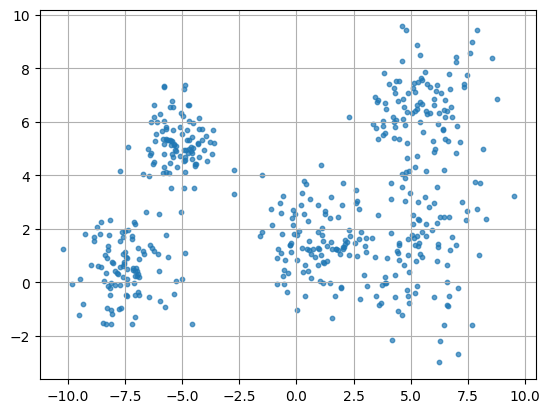

In [8]:
plt.scatter( X[:,0], X[:,1],s=10,alpha=0.7)
plt.grid()
plt.show()

фунция n-мерной нормальной плотности распределения
$$
\varphi(x;\theta)
=\mathcal{N}(x;\Sigma,\mu)
=\frac{ \exp\left( -\frac{1}{2}(x-\mu)^T \cdot \Sigma^{-1} \cdot (x-\mu) \right)  }
      { \sqrt{ (2\pi)^n \det \Sigma } }
$$

In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=n_comp).fit(X)
p = gm.predict(X)

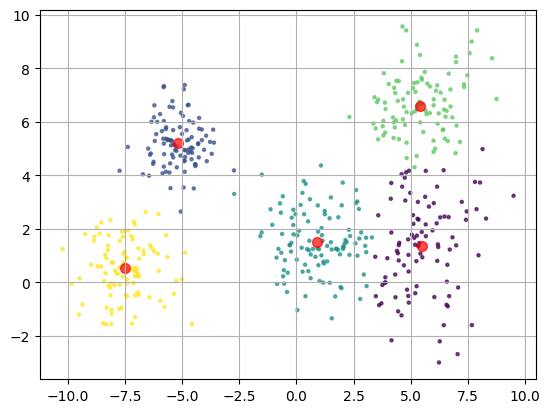

In [10]:
plt.scatter( X[:,0], X[:,1],s=5,alpha=0.7,c=p)
plt.scatter( gm.means_[:,0], gm.means_[:,1],s=50,alpha=0.7,c='r')
plt.grid()
plt.show()